# M. Deekshith Reddy
# AIE21081


## A1. Use HMM for classification of your speech signal using STFT features. 

In [3]:
!pip install hmmlearn

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from hmmlearn import hmm
import IPython.display as ipd
import scipy.signal as signal
import scipy.io.wavfile as wavfile
from glob import glob
import seaborn as sns
from scipy.signal import spectrogram

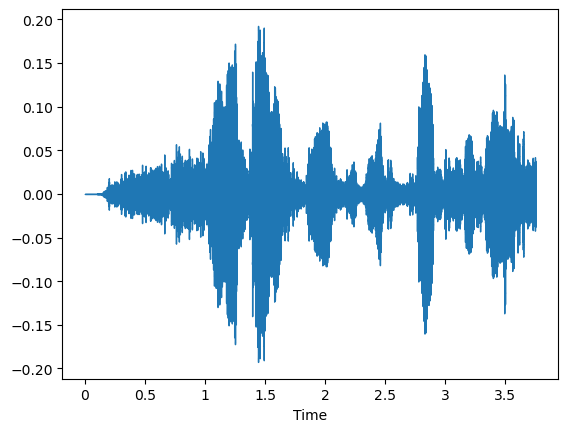

In [21]:
y, sr = librosa.load('deekshith1.wav')
librosa.display.waveshow(y)

In [22]:
a = glob('deekshith1.wav')
ipd.Audio(a[0])

In [23]:
def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)
    return y, sr

def stft_features(y, sr):
    stft = np.abs(librosa.stft(y))
    return stft

def train_hmm(features, n_components=3, n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    model.fit(features)
    return model

def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()

def classify_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels


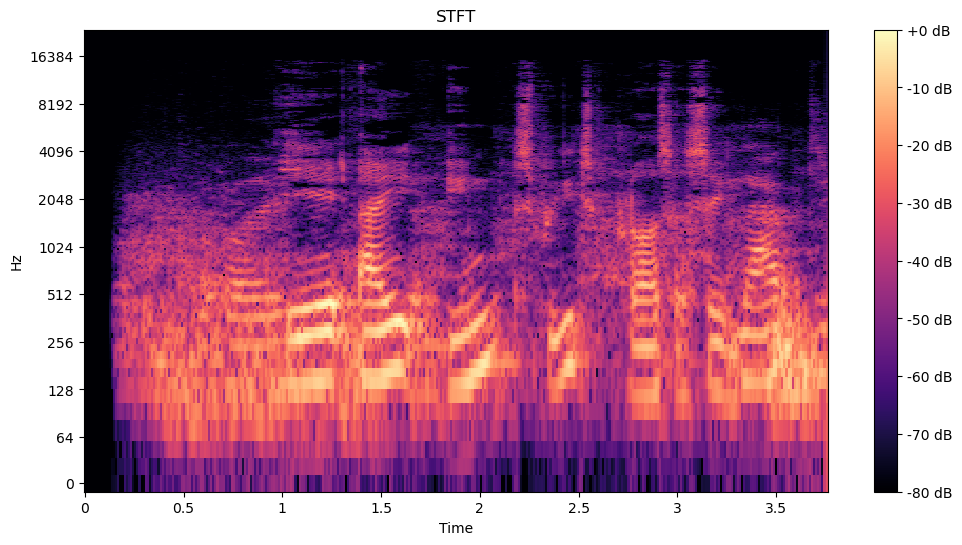

Model is not converging.  Current: 1068925.651006169 is not greater than 1069092.3730401436. Delta is -166.72203397471458


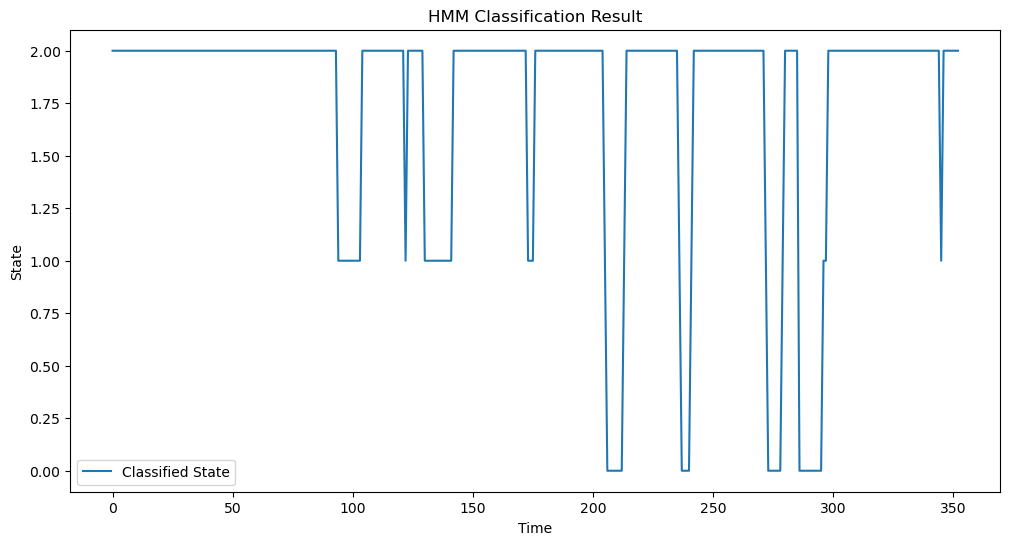

HMM Model Parameters:
Transition Matrix:
[[0.85185185 0.14814815 0.        ]
 [0.08571429 0.65714286 0.25714286]
 [0.00344828 0.02758621 0.96896552]]
Means:
[[2.81990197e-02 3.39947565e-02 7.25250251e-02 ... 1.60830851e-04
  1.77353485e-04 1.77264915e-04]
 [9.23844957e-02 1.86236629e-01 3.69187805e-01 ... 1.54261345e-04
  1.72797034e-04 1.28537122e-04]
 [6.60333207e-02 9.90313004e-02 2.45326358e-01 ... 1.88038663e-04
  1.96014010e-04 1.80688871e-04]]
Covariances:
[[[1.38522221e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 1.41115803e-03 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 2.74731844e-03 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.70377349e-04
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   3.70380175e-04 0.00000000e+00]
  [0.00000000e+00 0.0

In [24]:
def main():
    audio_file_path = "deekshith1.wav"
    
    # Load audio
    y, sr = load_audio(audio_file_path)
    
    # Extract STFT features
    stft = stft_features(y, sr)
    
    # Plot STFT
    plot_stft(stft, sr)
    
    # Train HMM
    model = train_hmm(stft.T)  # Transpose stft to fit HMM's requirement
    
    # Classify signal using trained HMM
    labels = classify_signal(model, stft)
    
    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)
    
    
    
if __name__ == "__main__":
    main()